In [1]:
# get train file names
import glob

train_folders = ['CAR', 'UAH', 'UJITI', 'UJIUB']

files_names = []
n_files = 0
for building in train_folders:
    cur_file_names = glob.glob('train/' + building + '/log*')
    files_names.append(sorted(cur_file_names))
    n_files += len(cur_file_names)

print(files_names)
print('There are %d files' % n_files)

[['train/CAR/logfile_CAR_R1_S3.txt', 'train/CAR/logfile_CAR_R1_S3mini.txt', 'train/CAR/logfile_CAR_R2_S3.txt', 'train/CAR/logfile_CAR_R2_S4.txt'], ['train/UAH/logfile_UAH_R1_S3.txt', 'train/UAH/logfile_UAH_R1_S4.txt', 'train/UAH/logfile_UAH_R2_S3.txt', 'train/UAH/logfile_UAH_R2_S4.txt', 'train/UAH/logfile_UAH_R4_S3.txt', 'train/UAH/logfile_UAH_R4_S4.txt'], ['train/UJITI/logfile_UJITI_R1_NEXUS5.txt', 'train/UJITI/logfile_UJITI_R2_NEXUS5.txt'], ['train/UJIUB/logfile_UJIUB_R1n_S3.txt', 'train/UJIUB/logfile_UJIUB_R1r_S3.txt', 'train/UJIUB/logfile_UJIUB_R2n_S3.txt', 'train/UJIUB/logfile_UJIUB_R2r_S3.txt', 'train/UJIUB/logfile_UJIUB_R3_S3.txt']]
There are 17 files


In [2]:
# import files into dataframes
import numpy as np
import pandas as pd

track= []
for building in files_names:
    track.append([])
    for track_name in building:
        print(track_name)
        track[-1].append(pd.read_csv(track_name, sep=';', engine='c', names=range(11)))
        print(np.unique(track[-1][-1][0]))
print(track[0][0].head())

train/CAR/logfile_CAR_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R1_S3mini.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'MAGN' 'POSI' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX' 'SOUN'
 'WIFI']
train/CAR/logfile_CAR_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX'
 'SOUN' 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R1_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R4_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logf

/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Find time limits per POSI id
def posi_time_limits(pos_array):
    # create start and end index time array
    pos_array['ind_begin_time'] = np.zeros((pos_array.shape[0]))
    pos_array['ind_end_time'] = np.zeros((pos_array.shape[0]))
    pos_array['ind_end_time'].iat[-1] = 99999

    for i in range(1, pos_array.shape[0]):
        cur_split = (float(pos_array['Time'].iloc[i]) + float(pos_array['Time'].iloc[i-1])) / 2
        pos_array['ind_begin_time'].iat[i] = cur_split       
        pos_array['ind_end_time'].iat[i-1] = cur_split       
    return pos_array

# create true ground dataframes
pos = []
for i in range(len(track)):
    pos.append([])
    for j in range(len(track[i])):
        pos[i].append(track[i][j][[1, 2, 3, 4, 5, 6, 7]].iloc[track[i][j][0].values == 'POSI'])
        pos[i][j] = pos[i][j].dropna(axis=1)
        pos[i][j].columns = ['Time', 'index', 'Lat', 'Lon', 'FloorID', 'BuildingID']
        pos[i][j] = posi_time_limits(pos[i][j])

i = 1
j = 2
print(files_names[i][j])
print(pos[i][j].shape[0])
print(pos[i][j]['FloorID'].values)
print(pos[i][j].head())

train/UAH/logfile_UAH_R2_S3.txt
64
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  2.  1.  0.  0.  0.  0.  0.  0.]
         Time  index          Lat       Lon  FloorID  BuildingID  \
4142    8.618    1.0  40.51278407  -3.34849      0.0        20.0   
16724  34.656    2.0  40.51296307  -3.34844      0.0        20.0   
24993  51.802    3.0  40.51296539  -3.34859      0.0        20.0   
32452  67.263    4.0  40.51302711  -3.34866      0.0        20.0   
39755  82.372    5.0  40.51307726  -3.34879      0.0        20.0   

       ind_begin_time  ind_end_time  
4142           0.0000       21.6370  
16724         21.6370       43.2290  
24993         43.2290       59.5325  
32452         59.5325       74.8175  
39755         74.8175       92.8480  


In [10]:
# associate signals with POSI ids. Spliting at middle of the time between POSI measurements using posi_time_limits
for i in range(len(track)):
    for j in range(len(track[i])):
        track[i][j]['POSI_floor'] = np.zeros((track[i][j].shape[0])) * np.nan
        track[i][j]['POSI_building'] = np.zeros((track[i][j].shape[0])) * np.nan
        for k in range(pos[i][j].shape[0]):
            ind_begin_time = pos[i][j]['ind_begin_time'].iloc[k]
            ind_end_time = pos[i][j]['ind_end_time'].iloc[k]
    
            ind = pos[i][j]['index'].iloc[k]
            ind_floor = pos[i][j]['FloorID'].iloc[k]
            ind_building = pos[i][j]['BuildingID'].iloc[k]
            
            index_limits = np.logical_and(track[i][j][1].values >= ind_begin_time, 
                                          track[i][j][1].values < ind_end_time)
            
            track[i][j]['POSI_floor'].iloc[index_limits] = ind_floor
            track[i][j]['POSI_building'].iloc[index_limits] = ind_building

print(track[i][j].head())

      0      1       2         3        4         5        6        7  \
0  GYRO  0.018  89.931   0.58521  0.41692  -0.74526  3.00000      NaN   
1  AHRS  0.019  89.931   36.8048   5.5949 -32.75710  0.31558 -0.04448   
2  LIGH  0.020  89.940    2124.0        0       NaN      NaN      NaN   
3  ACCE  0.020  89.941  -1.38864  6.10043   7.44118  3.00000      NaN   
4  GYRO  0.031  89.951  -0.48686  0.38546   0.01344  3.00000      NaN   

         8     9  10  POSI_floor  POSI_building  posi_lat  posi_lon  
0      NaN   NaN NaN         0.0           30.0  39.99367 -0.073939  
1 -0.25246 -43.0 NaN         0.0           30.0  39.99367 -0.073939  
2      NaN   NaN NaN         0.0           30.0  39.99367 -0.073939  
3      NaN   NaN NaN         0.0           30.0  39.99367 -0.073939  
4      NaN   NaN NaN         0.0           30.0  39.99367 -0.073939  


/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
# Pad ground truth in order to use interpolation later
for i in range(len(track)):
    for j in range(len(track[i])):
        pos_pad_start = pos[i][j].iloc[0]
        pos_pad_start.at['Time'] = 0
        pos_pad_end = pos[i][j].iloc[-1]
        pos_pad_end.at['Time'] = track[i][j][1].values[-1]
        pos_array = np.vstack((pos_pad_start.values.reshape((1, pos[i][j].shape[1])), 
                                pos[i][j].values, 
                                pos_pad_end.values.reshape((1, pos[i][j].shape[1]))))
        pos[i][j] = pd.DataFrame(pos_array, columns=pos[i][j].columns.values)

In [12]:
# Interpolate sensors' time
import scipy.interpolate as interpolate

for i in range(len(track)):
    for j in range(len(track[i])):
        interp_ground_truth_lat = interpolate.interp1d(pos[i][j]['Time'].astype(float), pos[i][j]['Lat'])
        track[i][j]['POSI_lat'] = interp_ground_truth_lat(track[i][j][1])
        interp_ground_truth_lon = interpolate.interp1d(pos[i][j]['Time'].astype(float), pos[i][j]['Lon'])
        track[i][j]['POSI_lon'] = interp_ground_truth_lon(track[i][j][1])
print(track[0][0].head())

      0      1         2         3          4          5        6       7  \
0  ACCE  0.094  4292.788  -1.38864    4.62560    8.40844  3.00000     NaN   
1  MAGN  0.095  4292.788  -5.64000  -39.72000  -19.56000  3.00000     NaN   
2  GYRO  0.097  4292.792  -0.16432   -0.20861   -0.19609  3.00000     NaN   
3  AHRS  0.098  4292.792   28.5264     9.6349 -161.85360  0.11909 -0.2296   
4  LIGH  0.098  4292.792   14561.0          3        NaN      NaN     NaN   

        8    9  10  POSI_floor  POSI_building   posi_lat  posi_lon   POSI_lat  \
0     NaN  NaN NaN         0.0           10.0  40.313471  -3.48315  40.313471   
1     NaN  NaN NaN         0.0           10.0  40.313471  -3.48315  40.313471   
2     NaN  NaN NaN         0.0           10.0  40.313471  -3.48315  40.313471   
3 -0.9504  3.0 NaN         0.0           10.0  40.313471  -3.48315  40.313471   
4     NaN  NaN NaN         0.0           10.0  40.313471  -3.48315  40.313471   

   POSI_lon  
0  -3.48315  
1  -3.48315  
2  -3.48

In [13]:
pressure = []
for i in range(len(track)):
    pressure.append([])
    for j in range(len(track[i])):
        pressure[-1].append(track[i][j][[1, 2, 3, 4, 'POSI_building', 'POSI_floor', 
                                         'POSI_lat', 'POSI_lon']].iloc[track[i][j][0].values == 'PRES'])
        pressure[i][j].columns = ['AppTime', 'SensorTime', 'Pressure','SensorAcc', 'POSI_building', 'POSI_floor', 
                                  'POSI_lat', 'POSI_lon']
        pressure[i][j].index = pressure[i][j]['AppTime']
        pressure[i][j] = pressure[i][j].drop('AppTime', axis=1)
        pressure[i][j] = pressure[i][j].astype(float)
print(pressure[0][1].head())

Empty DataFrame
Columns: [SensorTime, Pressure, SensorAcc, POSI_building, POSI_floor, POSI_lat, POSI_lon]
Index: []


In [14]:
# Smooth signal
def exp_smooth(time_series, sensor_series, alpha):
    # forward in time
    sensor_forward = np.zeros((sensor_series.shape))
    sensor_forward[0] = sensor_series[0]
    for i in range(1, time_series.shape[0]):
        dt = time_series[i] - time_series[i-1]
        sensor_forward[i] = alpha * sensor_series[i] + (1 - alpha) * sensor_forward[i-1]
    # backwards in time
    sensor_backwards = np.zeros((sensor_series.shape))
    sensor_trend = np.zeros((sensor_series.shape))
    sensor_backwards[-1] = sensor_series[-1]
    for i in range(time_series.shape[0]-2, -1, -1):
        dt = time_series[i+1] - time_series[i]
        sensor_backwards[i] = alpha * sensor_series[i] + (1 - alpha) * sensor_backwards[i+1]
    sensor_smoothed = (sensor_forward + sensor_backwards) / 2
    return sensor_smoothed

for i in range(len(pressure)):
    for j in range(len(pressure[i])):
        if pressure[i][j].shape[0]:
            pressure[i][j]['PresSmoothed'] = exp_smooth(pressure[i][j]['SensorTime'].values, 
                                                        pressure[i][j]['Pressure'].values, 0.02)

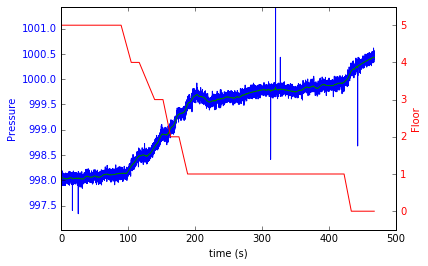

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot pressure and floor over time
i = 3
j = 1

fig, ax1 = plt.subplots()
ax1.plot(pressure[i][j].index.values, pressure[i][j]['Pressure'].values, 'b',
         pressure[i][j].index.values, pressure[i][j]['PresSmoothed'].values, 'g')
ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Pressure', color='b')
ax1.set_ylim([np.min(pressure[i][j]['PresSmoothed'].values) - 1, np.max(pressure[i][j]['PresSmoothed'].values) + 1])
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(pos[i][j]['Time'].values, pos[i][j]['FloorID'].values, 'r')
ax2.set_ylabel('Floor', color='r')
ax2.set_ylim([-0.5,5.5])
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

In [18]:
# Create wifi data frames
wifi = []
for i in range(len(track)):
    wifi.append([])
    for j in range(len(track[i])):
        wifi[-1].append(track[i][j][[1, 4, 5, 'POSI_floor', 'POSI_building', 'POSI_lat', 
                                     'POSI_lon']].iloc[track[i][j][0].values == 'WIFI'])
        wifi[-1][-1].columns = ['AppTime', 'MAC', 'rssi', 'POSI_floor', 'POSI_building', 'POSI_lat', 'POSI_lon']
print(wifi[0][0].head())

     AppTime                MAC  rssi  POSI_floor  POSI_building   POSI_lat  \
637    2.293  00:0b:86:27:36:c2 -82.0         0.0           10.0  40.313471   
638    2.293  00:0b:86:27:32:e0 -66.0         0.0           10.0  40.313471   
639    2.293  00:0b:86:27:32:e2 -66.0         0.0           10.0  40.313471   
640    2.293  00:0b:86:27:32:e1 -68.0         0.0           10.0  40.313471   
641    2.293  00:0b:86:27:36:c0 -82.0         0.0           10.0  40.313471   

     POSI_lon  
637  -3.48315  
638  -3.48315  
639  -3.48315  
640  -3.48315  
641  -3.48315  


In [19]:
# split to different tracks in order to not overfit while testing
route_numbering = [[0, 0, 1, 1], [2, 2, 3, 3, 4, 4], [5, 6], [7, 7, 8, 8, 9]]
test_route = 9

In [20]:
# Only for the train data
# create list of mac addresses for all the samples
total_macs = []
print('total macs')
for i in range(len(wifi)):
    for j in range(len(wifi[i])):
        if route_numbering[i][j] != test_route:
            track_mac_array = wifi[i][j]['MAC'].values
            for mac_add in track_mac_array:
                if not mac_add in total_macs:
                    total_macs.append(mac_add)
print(len(total_macs))

# create list of mac addresses for each building
building_macs = {10: [], 20: [], 30: [], 40: []}
for i in range(len(wifi)):
    for j in range(len(wifi[i])):
        if route_numbering[i][j] != test_route:
            track_mac_array = wifi[i][j]
            for k in range(track_mac_array.shape[0]):
                mac_line = track_mac_array.iloc[k]
                mac = mac_line['MAC']
                build = int(mac_line['POSI_building'])
                if not mac in building_macs[build]:
                    building_macs[build].append(mac)
print('building macs')
for build in sorted(building_macs):
    print(build, len(building_macs[build]), ',')

total macs
735
building macs
10 51 ,
20 353 ,
30 173 ,
40 158 ,


In [22]:
# Make WiFi data into global dummy variable
def dummify_wifi(wifi_df, wifi_list):
    wifi_samples = np.unique(wifi_df['AppTime'].values)
    wifi_dummy = np.ones((wifi_samples.shape[0], len(wifi_list))) * -200
    wifi_dummy = pd.DataFrame(wifi_dummy, columns=wifi_list, index=wifi_samples)
    for i, sample_time in enumerate(wifi_samples):
            wifi_cur = wifi_df.iloc[wifi_df['AppTime'].values == sample_time]
            for j in range(wifi_cur.shape[0]):
                if str(wifi_cur['MAC'].iat[j]) in wifi_list:
                    wifi_dummy[wifi_cur['MAC'].iat[j]].iat[i] = wifi_cur['rssi'].iat[j]
    return wifi_dummy

# Normalize wifi and cut noise
def normalize_wifi(wifi_dummy_df):
    max_per_line = np.amax(wifi_dummy_df, axis=1)
    wifi_dummy_df.iloc[:, :] = wifi_dummy_df.values - max_per_line.reshape((max_per_line.shape[0], 1))
    return wifi_dummy_df

# Add ground truth columnns to the wifi dataframe
def add_results_wifi(df, results_df):
    df['POSI_building'] = np.ones((df.shape[0],))
    df['POSI_floor'] = np.ones((df.shape[0],))
    df['interp_lat'] = np.ones((df.shape[0],))
    df['interp_lon'] = np.ones((df.shape[0],))
    wifi_samples = df.index.values
    for i, sample_time in enumerate(wifi_samples):
        results_cur = results_df.iloc[results_df['AppTime'].values == sample_time]
        for j in range(results_cur.shape[0]):
            df['POSI_building'].iat[i] = results_cur['POSI_building'].iat[0]
            df['POSI_floor'].iat[i] = results_cur['POSI_floor'].iat[0]
            df['interp_lat'].iat[i] = results_cur['POSI_lat'].iat[0]
            df['interp_lon'].iat[i] = results_cur['POSI_lon'].iat[0]
    return df

# Use different MACs as dummy variables in each time sample with RSSI as value
wifi_dummy_total = []
for i in range(len(wifi)):
    wifi_dummy_total.append([])
    for j in range(len(wifi[i])):
        print(i, j)
        wifi_dummy_total[i].append(dummify_wifi(wifi[i][j], total_macs))
        wifi_dummy_total[i][j] = normalize_wifi(wifi_dummy_total[i][j])
        wifi_dummy_total[i][j] = add_results_wifi(wifi_dummy_total[i][j], wifi[i][j])
print(wifi_dummy_total[0][0].head())

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
3 0
3 1
3 2
3 3
3 4
        00:0b:86:27:36:c2  00:0b:86:27:32:e0  00:0b:86:27:32:e2  \
2.293               -16.0                0.0                0.0   
8.276               -15.0                0.0                0.0   
14.269              -20.0                0.0               -3.0   
18.284              -19.0               -1.0               -2.0   
24.253              -16.0                0.0                0.0   

        00:0b:86:27:32:e1  00:0b:86:27:36:c0  00:0b:86:27:36:c1  \
2.293                -2.0              -16.0              -16.0   
8.276                 0.0              -15.0              -18.0   
14.269               -3.0              -20.0              -21.0   
18.284                0.0              -18.0              -18.0   
24.253                0.0              -17.0              -15.0   

        00:0b:86:27:35:90  00:0b:86:27:35:92  00:0b:86:27:35:91  \
2.293               -18.0              -15.0              -

In [23]:
# Make WiFi data into dummy variable with the buildingIDs as values. 
# In each row the number of MACs associated with the buildingID is the value
def dummify_wifi_building(wifi_df, wifi_building_list):
    wifi_samples = np.unique(wifi_df['AppTime'].values)
    wifi_dummy = np.zeros((wifi_samples.shape[0], len(wifi_building_list)))
    wifi_dummy = pd.DataFrame(wifi_dummy, columns=list(wifi_building_list.keys()), index=wifi_samples)
    for i, sample_time in enumerate(wifi_samples):
            wifi_cur = wifi_df.iloc[wifi_df['AppTime'].values == sample_time]
            for j in range(wifi_cur.shape[0]):
                for k in wifi_building_list:
                    if str(wifi_cur['MAC'].iat[j]) in wifi_building_list[k]:
                        wifi_dummy[k].iat[i] += 1
    return wifi_dummy

# Create WiFi dataframe 
wifi_dummy_building = []
for i in range(len(wifi)):
    wifi_dummy_building.append([])
    for j in range(len(wifi[i])):
        print(i, j)
        wifi_dummy_building[i].append(dummify_wifi_building(wifi[i][j], building_macs))
        wifi_dummy_building[i][j] = add_results_wifi(wifi_dummy_building[i][j], wifi[i][j])
print(wifi_dummy_building[0][0].head())
# print(wifi_dummy_building[1][0].head())
# print(wifi_dummy_building[2][0].head())
# print(wifi_dummy_building[3][0].head())

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
3 0
3 1
3 2
3 3
3 4
         40    10   20   30  POSI_building  POSI_floor  interp_lat  interp_lon
2.293   0.0  15.0  0.0  0.0           10.0         0.0   40.313471    -3.48315
8.276   0.0  15.0  0.0  0.0           10.0         0.0   40.313471    -3.48315
14.269  0.0  18.0  0.0  0.0           10.0         0.0   40.313471    -3.48315
18.284  0.0  16.0  0.0  0.0           10.0         0.0   40.313471    -3.48315
24.253  0.0  13.0  0.0  0.0           10.0         0.0   40.313471    -3.48315


In [28]:
# Train building on Random Forest using WiFi fingerprinting
from sklearn.ensemble import RandomForestClassifier

train_build = []
for i in range(len(wifi_dummy_total)):
    for j in range(len(wifi_dummy_total[i])):
        if route_numbering[i][j] != test_route:
            train_build.append(wifi_dummy_building[i][j])

# concat all train dataframes into one
train_build = pd.concat(train_build, axis=0)
train_build_results = train_build['POSI_building']
train_build = train_build[[10, 20, 30, 40]]

# Train RF
rfc_build = RandomForestClassifier(n_estimators=100, max_depth=4 ,max_features=1, random_state=2016)
rfc_build.fit(train_build.values, train_build_results.values)
print(rfc_build.classes_)

[ 10.  20.  30.  40.]


In [25]:
# Create test routes in order to evaluate the method
test_build = []
test_wifi_build = []
for i in range(len(wifi_dummy_building)):
    for j in range(len(wifi_dummy_building[i])):
        if route_numbering[i][j] == test_route:
            test_build.append(wifi_dummy_building[i][j][[10, 20, 30, 40]])
            test_wifi_build.append(wifi_dummy_total[i][j]['POSI_building'])
print(test_build[0].head())

         10   20    30   40
1.656   0.0  0.0  22.0  0.0
5.741   0.0  0.0  19.0  0.0
9.763   0.0  0.0  19.0  0.0
13.755  0.0  0.0  15.0  0.0
17.809  0.0  0.0  13.0  0.0


In [26]:
# Predict test routes using the RF algorithm. Predict for all the test data
predicted_build = []
predicted_build_proba = []
for i in range(len(test_build)):
    predicted_build.append(rfc_build.predict(test_build[i].values))
    predicted_build_proba.append(rfc_build.predict_proba(test_build[i].values))
    print(i, np.sum(predicted_build[i] == test_wifi_build[i].values) / test_wifi_build[i].shape[0])

0 1.0


In [43]:
# Smooth building predictions
predicted_build_proba_smoothed = []
predicted_build_smoothed = []
for i in range(len(predicted_build_proba)):
    # Smooth probabilities
    predicted_build_proba_smoothed.append(np.zeros(predicted_build_proba[i].shape))
    predicted_build_smoothed.append(np.zeros(predicted_build_proba[i].shape[0], ))
    for j in range(predicted_build_proba[i].shape[1]):
        predicted_build_proba_smoothed[i][:, j] = exp_smooth(test_build[i].index.values, 
                                                             predicted_build_proba[i][:, j], 0.01)
    # Smoothed result
    predicted_max = np.argmax(predicted_build_proba_smoothed[i], axis=1)
    for j in range(predicted_max.shape[0]):
        predicted_build_smoothed[i][j] = rfc_build.classes_[predicted_max[i]]     

In [45]:
# wifi train data with noise and all the macs
train_wifi = []
train_results = []
for i in range(len(wifi_dummy_total)):
    for j in range(len(wifi_dummy_total[i])):
        if route_numbering[i][j] != test_route:
            train_wifi.append(wifi_dummy_total[i][j])
train_wifi = pd.concat(train_wifi, axis=0)

# Create test routes using the dummy WiFi dataframe with all the MACs
test_wifi = []
test_wifi_floor = []
test_wifi_lat = []
test_wifi_lng = []
for i in range(len(wifi_dummy_total)):
    for j in range(len(wifi_dummy_total[i])):
        if route_numbering[i][j] == test_route:
            test_wifi.append(wifi_dummy_total[i][j])
            test_wifi_floor.append(wifi_dummy_total[i][j]['POSI_floor'])
            test_wifi_lat.append(wifi_dummy_total[i][j]['interp_lat'])
            test_wifi_lng.append(wifi_dummy_total[i][j]['interp_lon'])
print(test_wifi[0].head())

        00:0b:86:27:36:c2  00:0b:86:27:32:e0  00:0b:86:27:32:e2  \
1.656              -139.0             -139.0             -139.0   
5.741              -136.0             -136.0             -136.0   
9.763              -141.0             -141.0             -141.0   
13.755             -146.0             -146.0             -146.0   
17.809             -156.0             -156.0             -156.0   

        00:0b:86:27:32:e1  00:0b:86:27:36:c0  00:0b:86:27:36:c1  \
1.656              -139.0             -139.0             -139.0   
5.741              -136.0             -136.0             -136.0   
9.763              -141.0             -141.0             -141.0   
13.755             -146.0             -146.0             -146.0   
17.809             -156.0             -156.0             -156.0   

        00:0b:86:27:35:90  00:0b:86:27:35:92  00:0b:86:27:35:91  \
1.656              -139.0             -139.0             -139.0   
5.741              -136.0             -136.0             -13

In [46]:
# level noise when packets have lower power than it
def wifi_level_noise(wifi_dummy_df, noise):
    if len(wifi_dummy_df.shape) > 1:
        noise_not = (wifi_dummy_df.values >= noise) * 1
        wifi_dummy_df.iloc[:, :] = noise_not * wifi_dummy_df.values + (1- noise_not) * noise
    else:
        noise_not = (wifi_dummy_df.values >= noise) * 1
        wifi_dummy_df.iloc[:] = noise_not * wifi_dummy_df.values + (1- noise_not) * noise
    return wifi_dummy_df

# filter train samples by buildings in order to train floors
train_floor = {10: 0, 20: 0, 30: 0, 40: 0}
train_floor_results = {10: 0, 20: 0, 30: 0, 40: 0}
for building in train_floor:
    train_floor[building] = train_wifi.iloc[train_build_results.values == building][building_macs[building]]
    train_floor[building] = wifi_level_noise(train_floor[building], -10)
    train_floor_results[building] = train_wifi.iloc[train_build_results.values == building]['POSI_floor']

In [47]:
# Train floor on Random Forest using WiFi fingerprinting
from sklearn.ensemble import RandomForestClassifier
rfc_floor = {10: 0, 20: 0, 30: 0, 40: 0}
for building in rfc_floor:
    rfc_floor[building] = RandomForestClassifier(n_estimators=1000, max_depth=20 ,max_features=1.0, random_state=2016)
    rfc_floor[building].fit(train_floor[building].values, train_floor_results[building].values)

In [74]:
"""
Only works in the same building
"""
# Predict floors
predicted_floor = []
predicted_floor_proba = []
predicted_floor_proba_smoothed = []
predicted_floor_smoothed = []
for test_i in range(len(test_wifi)):
    predicted_floor.append([])
    predicted_floor_proba.append([])
    for row_i in range(test_wifi[test_i].shape[0]):
        cur_pred_build = predicted_build[test_i][row_i]
        cur_measurement = test_wifi[test_i][building_macs[cur_pred_build]].iloc[row_i]
        cur_measurement = wifi_level_noise(cur_measurement, -10)
        predicted_floor[test_i].append(int(rfc_floor[cur_pred_build].predict([cur_measurement.values])))
        predicted_floor_proba[test_i].append(rfc_floor[cur_pred_build].predict_proba([cur_measurement.values])[0])
    predicted_floor_proba[test_i] = np.array(predicted_floor_proba[test_i])
    print(predicted_floor_proba[test_i].shape)
    # Smooth probabilities                                            
    predicted_floor_proba_smoothed.append(np.zeros(predicted_floor_proba[test_i].shape))
    predicted_floor_smoothed.append(np.zeros(predicted_floor_proba[test_i].shape[0], ))
    for j in range(predicted_floor_proba[test_i].shape[1]):
        predicted_floor_proba_smoothed[test_i][:, j] = exp_smooth(test_wifi[test_i].index.values, 
                                                                  predicted_floor_proba[test_i][:, j], 0.2)
    # Smoothed result
    predicted_max = np.argmax(predicted_floor_proba_smoothed[test_i], axis=1)
    for j in range(predicted_max.shape[0]):
        predicted_floor_smoothed[test_i][j] = rfc_floor[cur_pred_build].classes_[predicted_max[j]]  
print(predicted_floor[test_i])
print(predicted_floor_smoothed[test_i])

(128, 6)
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  3.  3.  3.  3.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  1.  1.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.]


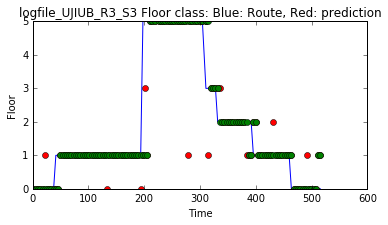

In [75]:
route = 0
# Plot results
plt.figure(1, figsize=(6, 3))
plt.plot(test_build[route].index.values, test_wifi_floor[route], 'b', 
         test_build[route].index.values, predicted_floor[route], 'ro',
         test_build[route].index.values, predicted_floor_smoothed[route], 'go',)
plt.xlabel('Time')
plt.ylabel('Floor')
plt.title('logfile_UJIUB_R3_S3 Floor class: Blue: Route, Red: prediction')
plt.show()